# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder




## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [ ]:
df=pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [ ]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
df.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
9463,17:39:00,Wednesday,Over 51,Male,High school,Employee,Below 1yr,Pick up upto 10Q,Owner,2-5yrs,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury


In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Sex_of_driver'].value_counts()

,count
Sex_of_driver,
Male,11437
Female,701
Unknown,178


In [ ]:
Master_coulmns=[x for x in df.columns ]
Master_coulmns

['Time',
 'Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

In [ ]:
df[df.duplicated(subset=Master_coulmns[:2])]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df['Time']=pd.to_datetime(df['Time'])

In [ ]:
df.drop(columns='Defect_of_vehicle', axis=1, inplace=True)

In [ ]:
df.drop(columns='Service_year_of_vehicle', axis=1, inplace=True)

In [ ]:
print(df.columns)  # Print the available columns to verify if 'Hour' exists

# If 'Hour' doesn't exist, identify the correct column name and replace 'Hour' below
if 'Hour' not in df.columns:
    print("Column 'Hour' not found. Available columns are:", df.columns)
else:
    # Assuming 'Hour' column is numeric and exists in the DataFrame
    scaler = MinMaxScaler()
    df['Hour'] = scaler.fit_transform(df[['Hour']])

    standardizer = StandardScaler()
    df['Hour'] = standardizer.fit_transform(df[['Hour']])

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')
Column 'Hour' not found. Available columns are: Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle'

In [ ]:

label_encoder = LabelEncoder()
df['Sex_of_driver'] = label_encoder.fit

In [ ]:
# Verify if the columns exist in your DataFrame
print(df.columns)

if 'Day_of_week' in df.columns and 'Type_of_vehicle' in df.columns:
    df = pd.get_dummies(df, columns=['Day_of_week', 'Type_of_vehicle'])
else:
    print("Error: 'Day_of_week' and/or 'Type_of_vehicle' columns not found in the DataFrame.")


Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [ ]:
def fill_with_mode(series):
    mode_value = series.mode()
    if not mode_value.empty:
        return series.fillna(mode_value[0])
    return series

In [ ]:
df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0],inplace=True)
df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0],inplace=True)
df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode()[0],inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0],inplace=True)
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0],inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 54 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Time                                  12316 non-null  object
 1   Age_band_of_driver                    12316 non-null  object
 2   Sex_of_driver                         12316 non-null  object
 3   Educational_level                     11575 non-null  object
 4   Vehicle_driver_relation               11737 non-null  object
 5   Driving_experience                    12316 non-null  object
 6   Owner_of_vehicle                      11834 non-null  object
 7   Service_year_of_vehicle               8388 non-null   object
 8   Defect_of_vehicle                     12316 non-null  object
 9   Area_accident_occured                 12077 non-null  object
 10  Lanes_or_Medians                      11931 non-null  object
 11  Road_allignment             

In [ ]:
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].apply(lambda x: str(x).replace('Above ', ''))
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].apply(lambda x: str(x).replace(' yrs', ''))

df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace('NaN', np.nan)
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].fillna('-1')
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace(-1, np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 54 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Time                                  12316 non-null  object
 1   Age_band_of_driver                    12316 non-null  object
 2   Sex_of_driver                         12316 non-null  object
 3   Educational_level                     11575 non-null  object
 4   Vehicle_driver_relation               11737 non-null  object
 5   Driving_experience                    12316 non-null  object
 6   Owner_of_vehicle                      11834 non-null  object
 7   Service_year_of_vehicle               12316 non-null  object
 8   Defect_of_vehicle                     12316 non-null  object
 9   Area_accident_occured                 12077 non-null  object
 10  Lanes_or_Medians                      11931 non-null  object
 11  Road_allignment             

In [ ]:
df['Age_band_of_driver'] = df['Age_band_of_driver'].apply(lambda x: str(x).replace('na', ''))


df['Age_band_of_driver'] = df['Age_band_of_driver'].replace('na', np.nan)
df['Age_band_of_driver'] = df['Age_band_of_driver'].replace('null', np.nan)
df['Age_band_of_driver'] = df['Age_band_of_driver'].fillna('-1')


df['Age_band_of_driver'] = df['Age_band_of_driver'].replace(-1, np.nan)

print(df['Age_band_of_driver'].dtype)
print(df['Age_band_of_driver'].unique())

object
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']


In [ ]:
df.isna().sum()

,0
Time,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,0
Owner_of_vehicle,482
Service_year_of_vehicle,0
Defect_of_vehicle,0
Area_accident_occured,239


In [ ]:
numeric_df=df.select_dtypes(include=['int64','float64'])
categorical_df=df.select_dtypes(include=['object'])
categorical_df.head()

,Time,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,18-30,<bound method LabelEncoder.fit of LabelEncoder()>,Above high school,Employee,1-2yr,Owner,10yr,No defect,Residential areas,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,31-50,<bound method LabelEncoder.fit of LabelEncoder()>,Junior high school,Employee,Above 10yr,Owner,5-10yrs,No defect,Office areas,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,18-30,<bound method LabelEncoder.fit of LabelEncoder()>,Junior high school,Employee,1-2yr,Owner,nan,No defect,Recreational areas,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,18-30,<bound method LabelEncoder.fit of LabelEncoder()>,Junior high school,Employee,5-10yr,Governmental,nan,No defect,Office areas,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,18-30,<bound method LabelEncoder.fit of LabelEncoder()>,Junior high school,Employee,2-5yr,Owner,5-10yrs,No defect,Industrial areas,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
numeric_df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
numeric_data=df.select_dtypes(include=['int64','float64'])
categorical_data=df.select_dtypes(include=['object'])
# One-hot
encoded_categorical_data = pd.get_dummies(categorical_data, prefix=categorical_data.columns)

# Concatenate
final_data = pd.concat([encoded_categorical_data , numeric_data], axis=1)
final_data

,Time_0:01:00,Time_0:02:00,Time_0:03:00,Time_0:04:00,Time_0:06:00,Time_0:08:00,Time_0:09:00,Time_0:10:00,Time_0:11:00,Time_0:15:00,...,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Accident_severity_Fatal injury,Accident_severity_Serious Injury,Accident_severity_Slight Injury,Number_of_vehicles_involved,Number_of_casualties
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,2,2
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,2,2
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,2,2
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,2,2
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,2,1
12312,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,2,1
12313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,1,1
12314,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,2,1


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

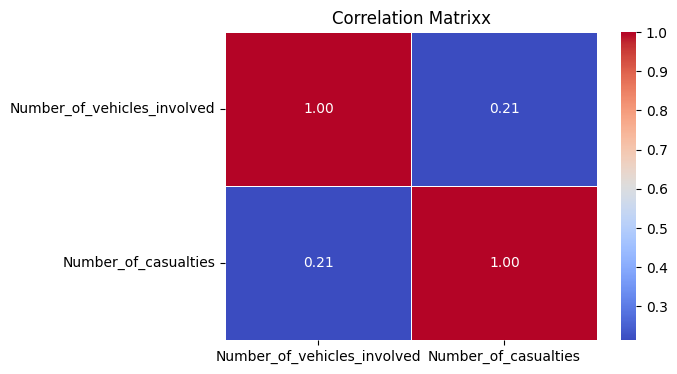

In [ ]:

corr = df[['Number_of_vehicles_involved', 'Number_of_casualties']].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrixx')
plt.show()

<ipython-input-575-f8c86040eb5e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


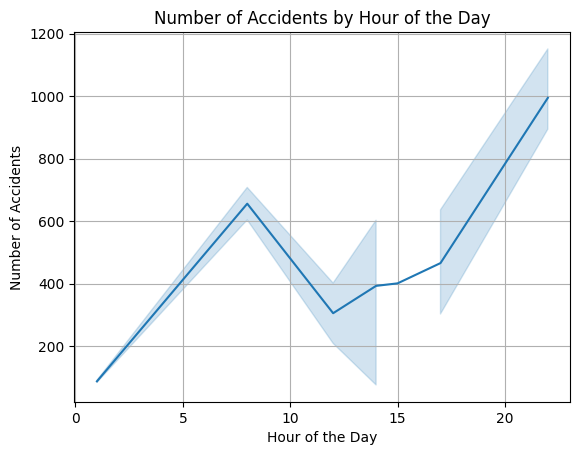

In [ ]:
if 'Time' in df.columns:
    df['Hour'] = pd.to_datetime(df['Time']).dt.hour

sns.lineplot(data=df, x='Hour', y=df.groupby('Hour').size())
plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

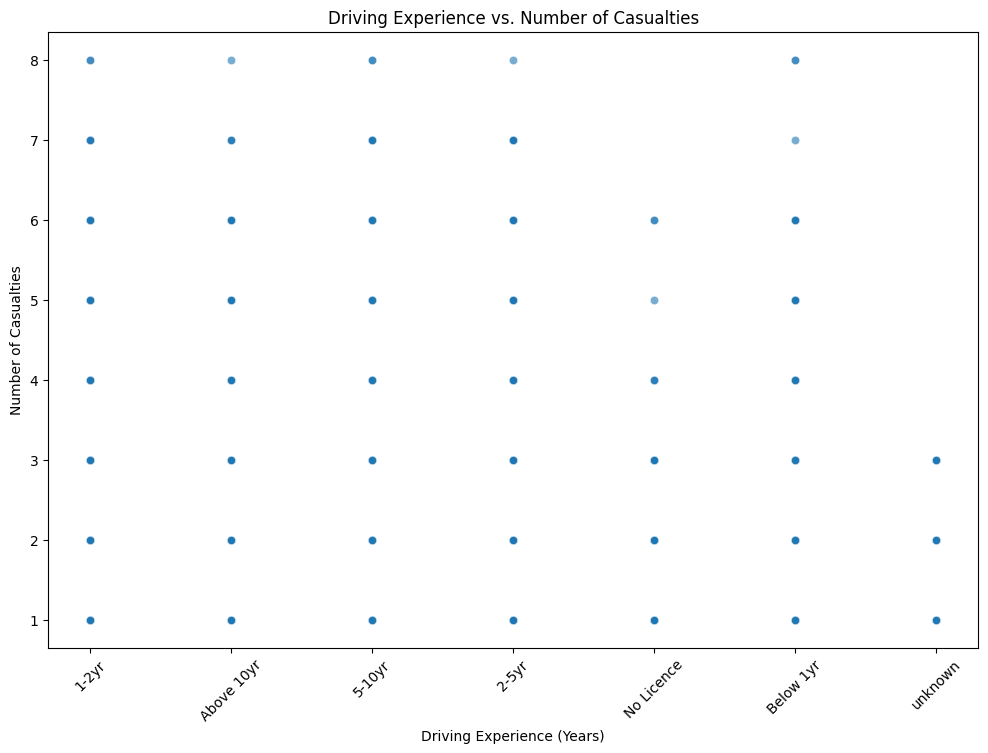

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Driving_experience', y='Number_of_casualties', alpha=0.6)
plt.title('Driving Experience vs. Number of Casualties')
plt.xlabel('Driving Experience (Years)')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.show()

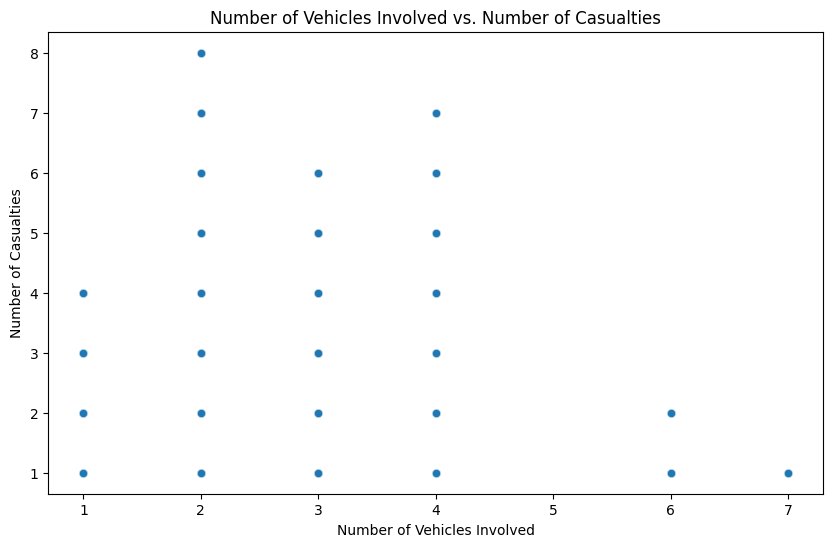

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number_of_vehicles_involved', y='Number_of_casualties', alpha=0.5)
plt.title('Number of Vehicles Involved vs. Number of Casualties')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [ ]:
data = fetch_california_housing()
X = data.data
y = data.target


In [ ]:
# splitting
X=final_data.iloc[:,:-1]
y=final_data.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
steps = [
    ('scaler', StandardScaler()),  # Transformer step
    ('regressor', LinearRegression())  # Estimator step
]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.6800655167409704e+23


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Time                                  12316 non-null  object
 1   Age_band_of_driver                    12316 non-null  object
 2   Sex_of_driver                         12316 non-null  object
 3   Educational_level                     11575 non-null  object
 4   Vehicle_driver_relation               11737 non-null  object
 5   Driving_experience                    12316 non-null  object
 6   Owner_of_vehicle                      11834 non-null  object
 7   Service_year_of_vehicle               12316 non-null  object
 8   Defect_of_vehicle                     12316 non-null  object
 9   Area_accident_occured                 12077 non-null  object
 10  Lanes_or_Medians                      11931 non-null  object
 11  Road_allignment             

In [ ]:
X = df_encoded.drop('Accident_severity', axis=1)
y = df_encoded['Accident_severity']


#### Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression
Accuracy: 0.6998646820027064
Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.95      0.82      2499
           2       0.53      0.21      0.30       678
           3       0.48      0.12      0.20       273
           4       0.63      0.12      0.21       137
           5       0.69      0.16      0.26        69
           6       0.88      0.26      0.40        27
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         4

    accuracy                           0.70      3695
   macro avg       0.49      0.23      0.27      3695
weighted avg       0.66      0.70      0.64      3695

Confusion Matrix:
 [[2376   86   26    7    3    1    0    0]
 [ 529  141    6    1    1    0    0    0]
 [ 218   20   34    1    0    0    0    0]
 [ 105   11    3   17    1    0    0    0]
 [  48    8    1    1   11    0    0    0]
 [  19    1    0    0    0    7    0    0]

#### Decision Tree Classifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_decision_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))
print("\n")

Decision Tree Classifier
Accuracy: 0.7851150202976996
Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.88      0.86      2499
           2       0.64      0.54      0.59       678
           3       0.61      0.62      0.62       273
           4       0.78      0.63      0.70       137
           5       0.74      0.71      0.73        69
           6       0.83      0.93      0.88        27
           7       1.00      1.00      1.00         8
           8       1.00      0.25      0.40         4

    accuracy                           0.79      3695
   macro avg       0.81      0.69      0.72      3695
weighted avg       0.78      0.79      0.78      3695

Confusion Matrix:
 [[2193  187   87   19    9    4    0    0]
 [ 282  369   18    3    5    1    0    0]
 [  88   12  170    2    1    0    0    0]
 [  40   10    0   86    1    0    0    0]
 [  17    1    2    0   49    0    0    0]
 [   0    1    0    0    1   25    0 

#### Support Vector Machine (SVM)

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine
Accuracy: 0.6779431664411367
Classification Report:
               precision    recall  f1-score   support

           1       0.68      1.00      0.81      2499
           2       0.58      0.01      0.02       678
           3       0.00      0.00      0.00       273
           4       0.00      0.00      0.00       137
           5       0.00      0.00      0.00        69
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         4

    accuracy                           0.68      3695
   macro avg       0.16      0.13      0.10      3695
weighted avg       0.57      0.68      0.55      3695

Confusion Matrix:
 [[2498    1    0    0    0    0    0    0]
 [ 671    7    0    0    0    0    0    0]
 [ 273    0    0    0    0    0    0    0]
 [ 137    0    0    0    0    0    0    0]
 [  65    4    0    0    0    0    0    0]
 [  27    0    0    0    0    0    0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-Neighbors Classifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Neighbors Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Neighbors Classifier
Accuracy: 0.6525033829499324
Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.93      0.79      2499
           2       0.29      0.10      0.15       678
           3       0.18      0.03      0.05       273
           4       0.67      0.01      0.03       137
           5       0.56      0.07      0.13        69
           6       1.00      0.11      0.20        27
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         4

    accuracy                           0.65      3695
   macro avg       0.42      0.16      0.17      3695
weighted avg       0.57      0.65      0.57      3695

Confusion Matrix:
 [[2324  146   26    1    2    0    0    0]
 [ 605   69    3    0    1    0    0    0]
 [ 253   11    8    0    1    0    0    0]
 [ 123    9    3    2    0    0    0    0]
 [  59    2    3    0    5    0    0    0]
 [  21    3    0    0    0    3    0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation Metrics:")

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)

    precision = precision_score(y_true, y_pred, average='weighted')
    print("Precision:", precision)

    recall = recall_score(y_true, y_pred, average='weighted')
    print("Recall:", recall)

    f1 = f1_score(y_true, y_pred, average='weighted')
    print("F1 Score:", f1)
    print("\n")

def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    print(f'{model_name} ROC AUC:', roc_auc)

Logistic Regression Evaluation Metrics:
Confusion Matrix:
 [[2376   86   26    7    3    1    0    0]
 [ 529  141    6    1    1    0    0    0]
 [ 218   20   34    1    0    0    0    0]
 [ 105   11    3   17    1    0    0    0]
 [  48    8    1    1   11    0    0    0]
 [  19    1    0    0    0    7    0    0]
 [   6    1    1    0    0    0    0    0]
 [   4    0    0    0    0    0    0    0]]
Accuracy: 0.6998646820027064
Precision: 0.6607093508418629
Recall: 0.6998646820027064
F1 Score: 0.6384795132015527




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


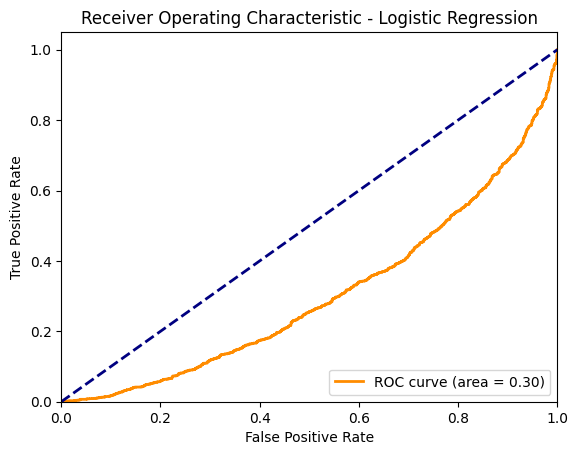

Logistic Regression ROC AUC: 0.3045141133376428


In [ ]:
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# Plot ROC Curve
plot_roc_curve(y_test, y_pred_proba_log_reg, "Logistic Regression")

Decision Tree Classifier Evaluation Metrics:
Confusion Matrix:
 [[2193  187   87   19    9    4    0    0]
 [ 282  369   18    3    5    1    0    0]
 [  88   12  170    2    1    0    0    0]
 [  40   10    0   86    1    0    0    0]
 [  17    1    2    0   49    0    0    0]
 [   0    1    0    0    1   25    0    0]
 [   0    0    0    0    0    0    8    0]
 [   3    0    0    0    0    0    0    1]]
Accuracy: 0.7851150202976996
Precision: 0.7797178984315783
Recall: 0.7851150202976996
F1 Score: 0.7808368588336829




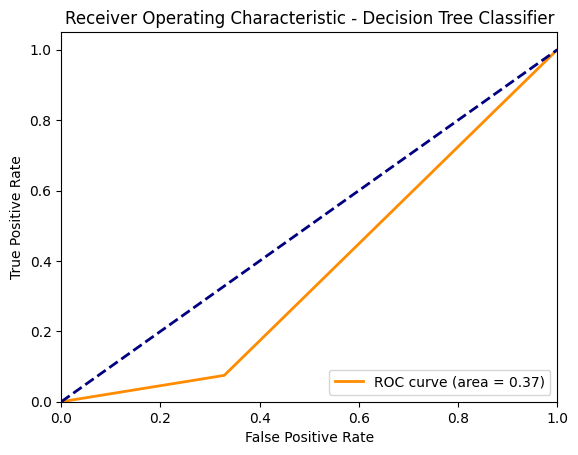

Decision Tree Classifier ROC AUC: 0.37311730712351826


In [ ]:
y_pred_proba_decision_tree = decision_tree.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_decision_tree, "Decision Tree Classifier")

plot_roc_curve(y_test, y_pred_proba_decision_tree, "Decision Tree Classifier")

Support Vector Machine Evaluation Metrics:
Confusion Matrix:
 [[2498    1    0    0    0    0    0    0]
 [ 671    7    0    0    0    0    0    0]
 [ 273    0    0    0    0    0    0    0]
 [ 137    0    0    0    0    0    0    0]
 [  65    4    0    0    0    0    0    0]
 [  27    0    0    0    0    0    0    0]
 [   8    0    0    0    0    0    0    0]
 [   4    0    0    0    0    0    0    0]]
Accuracy: 0.6779431664411367
Precision: 0.5657510993898381
Recall: 0.6779431664411367
F1 Score: 0.5502923200312796




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


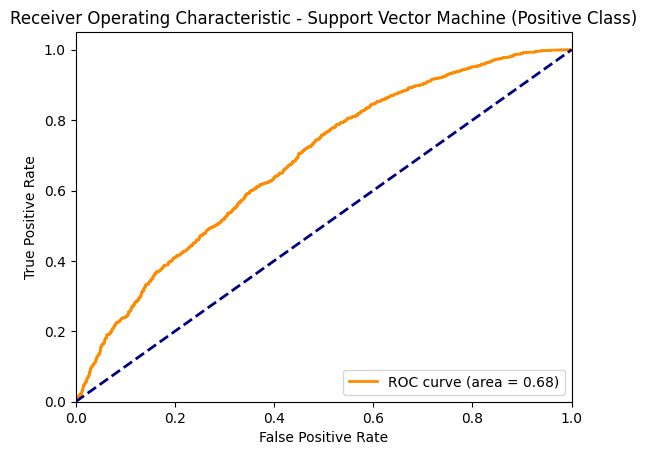

Support Vector Machine (Positive Class) ROC AUC: 0.6795922382330859


In [ ]:
y_decision_function = svm.decision_function(X_test)

y_pred_proba_svm = np.zeros((len(X_test), svm.classes_.size))
for i in range(svm.classes_.size):
    y_pred_proba_svm[:, i] = (y_decision_function[:, i] - y_decision_function[:, i].min()) / (y_decision_function[:, i].max() - y_decision_function[:, i].min())

positive_class_index = 0
y_pred_proba_positive_class = y_pred_proba_svm[:, positive_class_index]


evaluate_model(y_test, svm.predict(X_test), "Support Vector Machine")

plot_roc_curve(y_test, y_pred_proba_positive_class, "Support Vector Machine (Positive Class)")

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: